# Visual representation of how many different aircrafts were used for firefighting per year

The period from 2009 to 2021

In 2013 and 2014, the data in the archive is missing


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import plotly.express as px
from google.colab import files


In [ ]:
data = pd.read_excel('all aircrafts 09-21.xlsx')
data = data.drop(columns=['Unnamed: 0'])
print(data.head())


In [ ]:
# change all NaN values with 0
#data = data.replace(np.nan,0)
print(data.head())

#change date format
data['date'] = pd.to_datetime(data['date'], format="%d.%m.%Y.")


In [ ]:
#sort everything from 2018 to 2021
new_data = data.loc[::-1]
print(new_data.head())

In [ ]:
new_data = new_data.drop(columns=['text'])
new_data['year'] = new_data['date'].dt.year
new_data['months']= new_data['date'].dt.month
new_data['date']= new_data['date'].dt.date



In [ ]:
new_data = new_data.replace(np.nan,0)

In [ ]:
sum_data = new_data.groupby((new_data.year)).sum().reset_index()


In [ ]:
sum_data = new_data.groupby([(new_data.year), (new_data.months)]).sum().reset_index()
sum_data

In [ ]:
sum_data2 = sum_data.groupby([sum_data.year]).sum().reset_index()
sum_data2

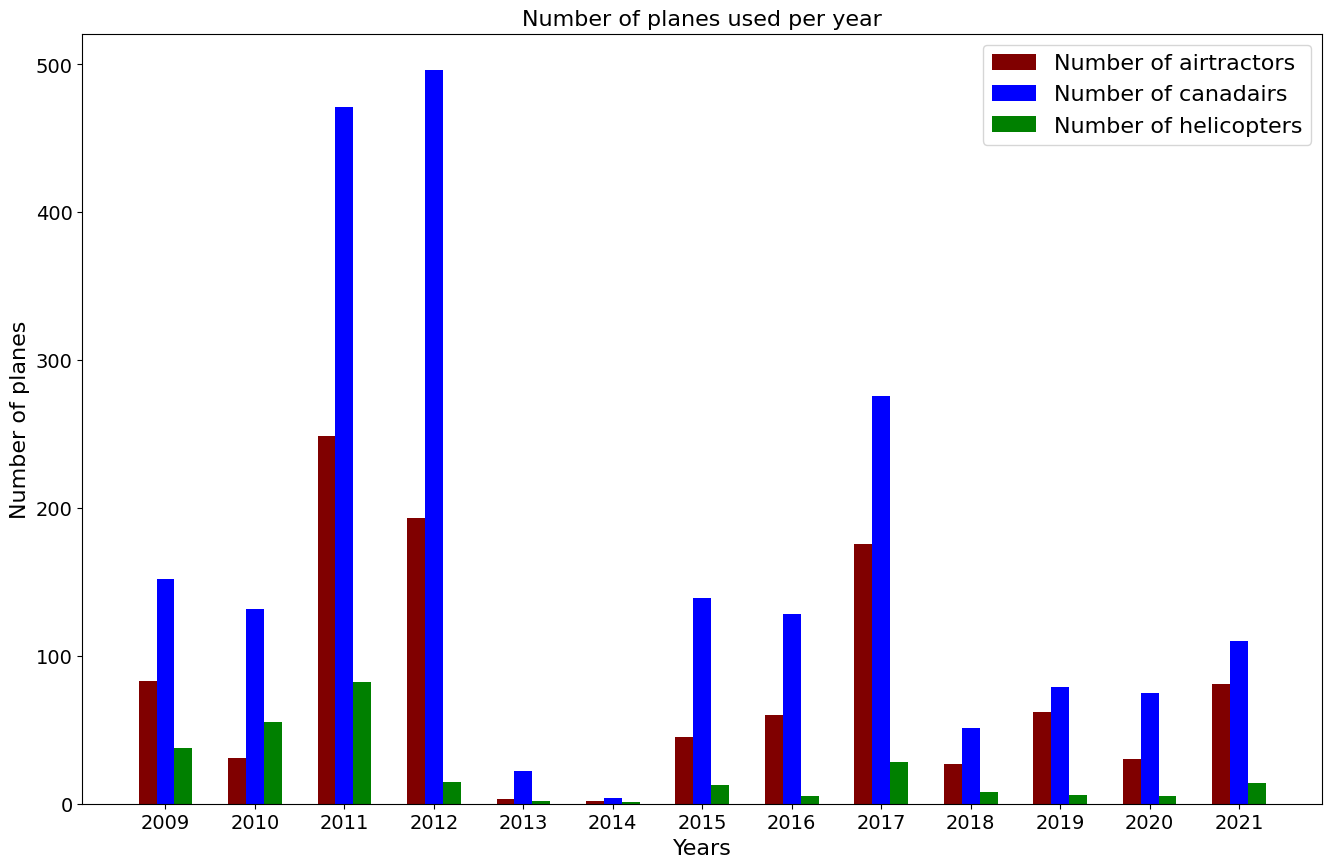

In [ ]:
plt.figure(figsize=(16,10))
plt.bar(sum_data2.year - 0.2, sum_data2.number_of_airtractors, color ='maroon', width = 0.2, label = 'Number of airtractors')
plt.bar(sum_data2.year, sum_data2.number_of_canadairs, color ='blue', width = 0.2, label = 'Number of canadairs')
plt.bar(sum_data2.year + 0.2, sum_data2.number_of_helicopters, color ='green', width = 0.2, label = 'Number of helicopters')

plt.xticks(sum_data2.year)
plt.xlabel("Years", fontsize =16)
plt.ylabel("Number of planes", fontsize =16)
plt.title("Number of planes used per year", fontsize =16)
plt.legend(fontsize =16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()